## Import Dataset
* Columns
  * **prc**: the buying price of the car)
  * **mnt**:  the maintenance cost
  * **drs**: number of doors
  * **prsn**: the seating capacity
  * **lug**: the luggage capacity
  * **sft**: measure of how safe the car is
  * **output**: the condition of the car

In [1]:
import pandas as pd

data = pd.read_csv('data/car_evaluation.csv', header=None,
                  names=['prc','mnt','drs','prsn','lug','sft','output'])
print(data.shape[0], 'records')
data.head()

1728 records


,prc,mnt,drs,prsn,lug,sft,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Data Analysis

### Distribution of output

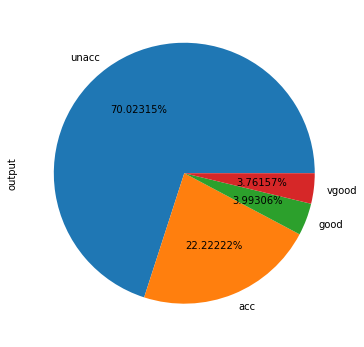

In [2]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"][0] = 8
plt.rcParams["figure.figsize"][1] = 6

data.output.value_counts().plot(kind='pie', autopct='%0.05f%%')

### Distribution of values for each feature

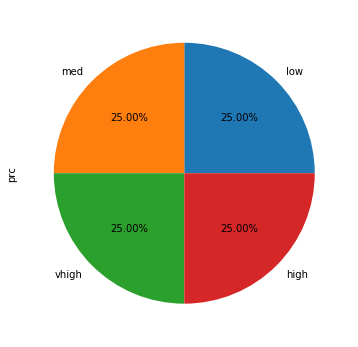

In [3]:
data.prc.value_counts().plot(kind='pie', autopct='%0.2f%%')

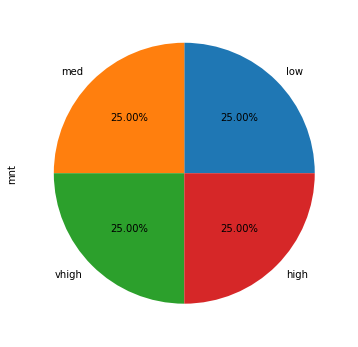

In [4]:
data.mnt.value_counts().plot(kind='pie', autopct='%0.2f%%')

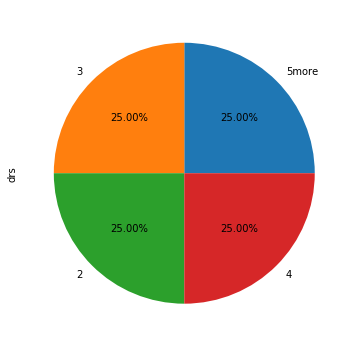

In [5]:
data.drs.value_counts().plot(kind='pie', autopct='%0.2f%%')

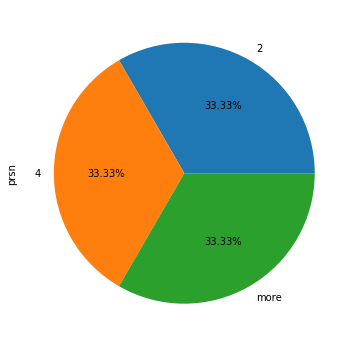

In [6]:
data.prsn.value_counts().plot(kind='pie', autopct='%0.2f%%')

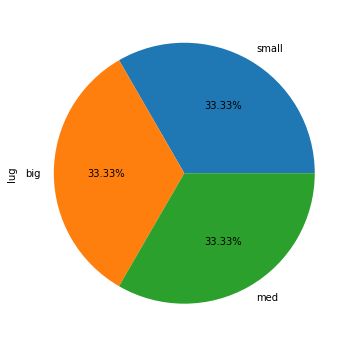

In [7]:
data.lug.value_counts().plot(kind='pie', autopct='%0.2f%%')

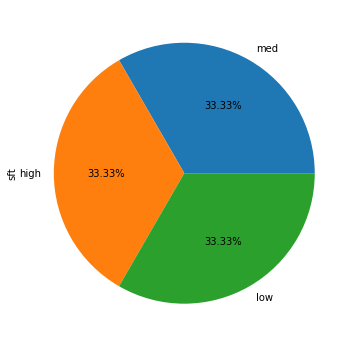

In [8]:
data.sft.value_counts().plot(kind='pie', autopct='%0.2f%%')

## Data Preprocessing

All the features are categorical

* Convert the categorical columns into numeric
  * ***One-hot encoding***: For each unique value in the categorical column, a new column is created. For the rows in the actual column where the unique value existed, a 1 is added to the corresponding row of the column created for that particular value. 
* Prepare features and labels

In [9]:
price = pd.get_dummies(data.prc, prefix='price')
maint = pd.get_dummies(data.mnt, prefix='maint')
doors = pd.get_dummies(data.drs, prefix='doors')
persons = pd.get_dummies(data.prsn, prefix='persons')
lugcap = pd.get_dummies(data.lug, prefix='lugcap')
safety = pd.get_dummies(data.sft, prefix='safety')
labels = pd.get_dummies(data.sft, prefix='condition')

labels.head()

,condition_high,condition_low,condition_med
0,0,1,0
1,0,0,1
2,1,0,0
3,0,1,0
4,0,0,1


In [10]:
X = pd.concat([price, maint, doors, persons, lugcap, safety], axis=1)
y = labels.values

## Split data into Training and Test sets

In [11]:
from sklearn.model_selection import train_test_split

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training set:', len(X_trn))
print('Test set:', len(X_tst))

Training set: 1382
Test set: 346


## Create model
* Using **Keras** functional API
* Input layer
* 2 Hidden layers with 15 and 10 neurons respoectively and ReLU activation function
* Output with 4 neurons for 4 label values and Softmax activation function
* Loss function = categorical cross-entropy
* Optimizer = Adam
* Evaluation metric = accuracy

In [12]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense (Dense)                (None, 15)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 523
Trainable params: 523
Non-trainable params: 0
_________________________________________________________________
None


## Train the model
* Epochs = 100
* Validation data = 20% of training data

In [13]:
training = model.fit(X_trn, y_trn, epochs=100, batch_size=8, verbose=1,
                     validation_split=0.2)

Train on 1105 samples, validate on 277 samples
Epoch 1/100
1105/1105 [==============================] - 0s 278us/sample - loss: 1.0995 - acc: 0.4344 - val_loss: 0.9530 - val_acc: 0.5993
Epoch 2/100
1105/1105 [==============================] - 0s 157us/sample - loss: 0.7267 - acc: 0.7394 - val_loss: 0.3650 - val_acc: 0.9819
Epoch 3/100
1105/1105 [==============================] - 0s 152us/sample - loss: 0.1658 - acc: 0.9973 - val_loss: 0.0491 - val_acc: 1.0000
Epoch 4/100
1105/1105 [==============================] - 0s 150us/sample - loss: 0.0290 - acc: 1.0000 - val_loss: 0.0150 - val_acc: 1.0000
Epoch 5/100
1105/1105 [==============================] - 0s 161us/sample - loss: 0.0109 - acc: 1.0000 - val_loss: 0.0071 - val_acc: 1.0000
Epoch 6/100
1105/1105 [==============================] - 0s 167us/sample - loss: 0.0058 - acc: 1.0000 - val_loss: 0.0042 - val_acc: 1.0000
Epoch 7/100
1105/1105 [==============================] - 0s 160us/sample - loss: 0.0036 - acc: 1.0000 - val_loss: 0.002

1105/1105 [==============================] - 0s 138us/sample - loss: 7.2329e-06 - acc: 1.0000 - val_loss: 6.7356e-06 - val_acc: 1.0000
Epoch 56/100
1105/1105 [==============================] - 0s 133us/sample - loss: 6.6612e-06 - acc: 1.0000 - val_loss: 6.2090e-06 - val_acc: 1.0000
Epoch 57/100
1105/1105 [==============================] - 0s 133us/sample - loss: 6.1366e-06 - acc: 1.0000 - val_loss: 5.7201e-06 - val_acc: 1.0000
Epoch 58/100
1105/1105 [==============================] - 0s 133us/sample - loss: 5.6548e-06 - acc: 1.0000 - val_loss: 5.2803e-06 - val_acc: 1.0000
Epoch 59/100
1105/1105 [==============================] - 0s 142us/sample - loss: 5.2104e-06 - acc: 1.0000 - val_loss: 4.8672e-06 - val_acc: 1.0000
Epoch 60/100
1105/1105 [==============================] - 0s 143us/sample - loss: 4.8004e-06 - acc: 1.0000 - val_loss: 4.4880e-06 - val_acc: 1.0000
Epoch 61/100
1105/1105 [==============================] - 0s 137us/sample - loss: 4.4242e-06 - acc: 1.0000 - val_loss: 4.1405

## Evaluate the model

In [14]:
score, acc = model.evaluate(X_tst, y_tst, verbose=1)

print('Test score:', score)
print('Test accuracy:', acc)

346/346 [==============================] - 0s 33us/sample - loss: 2.0741e-07 - acc: 1.0000
Test score: 2.0741040819071407e-07
Test accuracy: 1.0


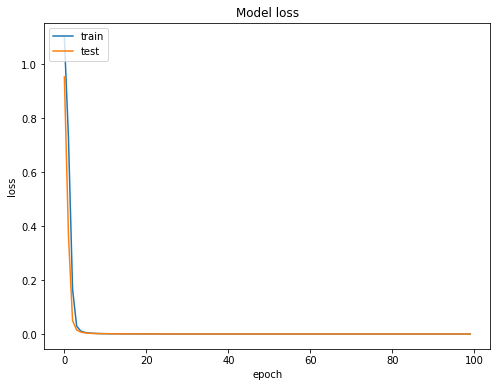

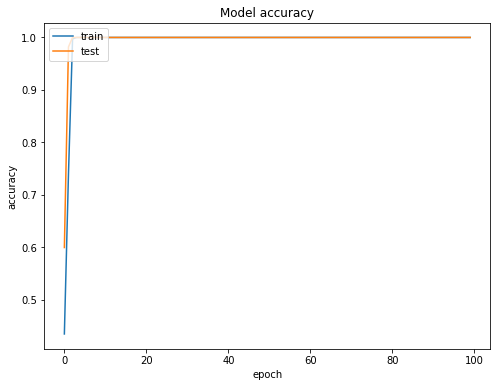

In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.figure()
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()